In [1]:
from IPython.display import Image

지금까지는 대부분 시간 축에 따른 특성을 알아보았다. 이를 **Time-domain analysis**라고 부른다. 한편, 또 다른 접근법으로 시계열 배후에 있는 주기성을 밝히는 방법이 있는데, 이를 **Frequency-domain analysis** 혹은 **Spectral analysis**라고 부른다.

# (1) Spectral density function

앞선 시계열 모형이 자기상관함수로 모형 특성을 요약하듯이, 스펙트럼 분석에서는 **스펙트럼 밀도 함수르 모형 특성을 요약한다.** 스펙트럼 밀도 함수는 **각 주파수(Angular Frequency)의 함수**로 표현된다. 각 주파수란, **360$^\circ(2\pi)$ 회전할 때의 각 속도**를 말한다. 만약 $2\pi$를 회전하는 주기가 2(시간)라면, 단윈 시간당 $\pi$를 회전하는 것이니 각 주파수는 $\pi$이다. 이들의 관계는 아래와 같다.  

$$
\omega = \frac{2\pi}{T} \qquad (7.1)
$$  

기댓값이 0이고, 시계열이 정상적이고, 자기공분산함수 $\gamma(h)$의 절댓값 합이 $\sum_{h=-\infty}^\infty \left | \gamma(h) \right | < \infty$라고 가정했을 때, $Z_t$에 대한 스펙트럼 밀도 함수는 아래와 같이 정의된다.  

$$
f(\omega) = \frac{1}{2\pi}\sum_{h=-\infty}^\infty e^{-ih\omega}\gamma(h), \quad -\infty < \omega < \infty \qquad (7.2)
$$  

즉, **스펙트럼 밀도 함수는 자기공분산함수에 대한 Fourier transform**이라 할 수 있다. 스펙트럼 밀도 함수를 단순히 스펙트럼이라부르기도 한다.  

위 (7.2) 식에서 $e^{-ih\omega} = cos(h\omega) - isin(h\omega), \quad cos(i) = cos(-i), \quad \gamma(h) = \gamma(-h)$이기 때문에 아래와 같이 쓸 수있다.  

$$
\begin{aligned}
f(\omega) & = \frac{1}{2\pi}\sum_{h=-\infty}^\infty [cos(h\omega) - isin(h\omega)]\gamma(h) \\
& = \frac{1}{2\pi} \sum_{h=-\infty}^{-1} \left [ cos(h\omega) - isin(h\omega) \right ] \gamma(h) + \frac{1}{2\pi}\gamma(0) + \frac{1}{2\pi}\sum_{h=1}^\infty \left [ cos(h\omega)-isin(h\omega) \right ] \gamma(h) \\
& = \frac{1}{2\pi}\gamma(0) + \frac{1}{2\pi}\sum_{h=1}^\infty 2cos(h\omega)\gamma(h) \\
& = \frac{1}{2\pi}\left [ \gamma(0) + 2\sum_{h=1}^\infty \gamma(h)cos(h\omega) \right ]
\end{aligned}
$$  

즉, 스펙트럼은 원점에 대해 대칭이며, 코사인 함수의 주기가 2$\pi$임에 따라  $\omega$는 $\left [ 0, \pi \right ]$의 주파수 영역에서 정의하기만 하면 된다. 따라서 정리하면 아래와 같다.

$$
f(\omega) = \frac{1}{2\pi}\left [ \gamma(0) + 2\sum_{h=1}^\infty \gamma(h)cos(h\omega) \right ], \quad \omega \in \left [ 0, \pi \right ] \qquad (7.3)
$$  

즉, 어떤 시게열의 자기공분산함수를 알면 그에 대응되는 스펙트럼 밀도 함수를 구할 수 있게 된다. 추가로, 스펙트럼 밀도 함수를 통해 자기공분산 함수를 구할 수도 있다. 이는 **역 푸리에 변환(Inverse Fourier Transform)** 을 활용한다. 즉,

$$
\gamma(h) = \int_{-\pi}^\pi e^{ih\omega}f(\omega)d\omega
$$

여기서 $h=0$일 때의 값, 즉 시계열 분산은 아래와 같이 구해진다.  

$$
\gamma(0) = Var(X_t) = \int_{-\pi}^\pi f(\omega) d\omega
$$  

다시 말해, 스펙트럼을 $\left ( -\pi, \pi \right )$ 영역에 적분하면 그 값이 바로 분산이 된다. 따라서 **스펙트럼 밀도함수란 분산을 각 주파수 별로 분해해 어떤 주파수가 분산에 얼마나 기여하는지를 보여준다.** noise의 스펙트럼이 주파수에 대해 일정한 수치를 보인다는 것은 주파수에 관계없이 일정하게 분산에 기여한다는 뜻이 된다.

# (2) Spectrum of ARMA Model

시계열이 MA 형태로 표현되는 경우 스펙트럼을 더 쉽게 구하는 방법을 알아보자.  

$$
Z_t = \sum_{j=1}^\infty \psi_ja_{t-j} = \psi(B)a_t
$$

이런 MA  형태로 표현된 시계열 모델이 있다. 여기서 $\psi_0$ = 1, $\psi(B) = \sum_{j=0}^\infty \psi_jB^j$이다. 그러면, $\sum_{j=0}^\infty \left | \psi_j B^j \right | < \infty$일 때, 스펙트럼 밀도 함수는 noise spectrum $f_a(\omega)$와 아래의 관계식을 갖는다.  

$$
f(\omega) = \left | \psi(e^{-i\omega})\right |^2 f_a(\omega) = \frac{\sigma_a^2}{2\pi} \left | \psi(e^{-i\omega}) \right |^2 \qquad (7.4)
$$

식 (7.4)에 ARMA 모형을 활용해보자. ARMA 모형이 $\phi_p(B)Z_t = \theta_q(B)a_t$로 주어졌을 때, 스펙트럼은 아래와 같다. 

$$
f(\omega) = \frac{\sigma_a^2}{2\pi}\left | \frac{\theta_q(e^{-i\omega})}{\phi_p(e^{-i\omega})} \right |^2 \qquad (7.5)
$$ 

여기서  

$$
\begin{aligned}
& \phi_p(x) = 1 - \phi_1x - \cdots - \phi_px^p \\
& \theta_q(x) = 1 - \theta_1x - \cdots - \theta_qx^q
\end{aligned}
$$

### (A) Seasonal ARMA Model

계절성 ARMA 모델도 정상성을 만족하면 식 (7.4)를 활용해 스펙트럼을 구할 수 있다. $Z_t - \Phi Z_{t-12} = a_t$라고 정의하면, 스펙트럼은 아래와 같이 얻어진다.  

$$
f(\omega) = \frac{\sigma_a^2}{2\pi}\frac{1}{(1-\Phi e^{-i12\omega})(1 - \Phi e^{i12\omega})} = \frac{\sigma_a^2}{2\pi} \frac{1}{1 + \Phi^2 - 2\Phi cos(12\omega)}
$$  

차분을 취한 후의 시게열에 대한 스펙트럼 역시 유사하게 유도된다. 예를 들어 1차 차분을 취한 시계열은 $W_t = (1-B)Z_t$이고, 여기에 대한 스펙트럼은 

$$
f_W(\omega) = \left | 1 - e^{-i\omega} \right |^2 f_Z(\omega) = 2(1 - cos(\omega))f_Z(\omega)
$$

# (3) Estimation on spectrum

식 (7.3)에서, 자기공분산함수 대신 표본자기공분산 함수를 대입함으로써 스펙트럼을 추정할 수 있다. 즉, 아래와 같다.  

$$
\hat{f}(\omega) = \frac{1}{2\pi}\left [ \hat{\gamma}(0) + 2\sum_{h=1}^{n-1} \hat{\gamma}(h)cos(h\omega) \right ], \quad \omega \in \left [ 0, \pi \right ] \qquad (7.6)
$$   

이를 **표본 스펙트럼(Sample spectrum)** 이라고 부른다.

### (A) Estimation by Periodogram

표본 스펙트럼을 활용한 추정 방법 말고도 주기도(Periodogram)을 활용하는 방법이 있다. **Periodogram은 이산 푸리에 변환(Discrete Fourier Transform ; DFT)를 통해 정의된다.**  

이산 푸리에 변환이란 아래와 같은데,
$$
\begin{aligned}
c_k & = \frac{1}{\sqrt{n}} \sum_{t=1}^n z_t e^{-itw_k} \\
& = \frac{1}{\sqrt{n}} \sum_{t=1}^n z_t cos(tw_k) - i\frac{1}{\sqrt{n}} \sum_{t=1}^n z_t sin(tw_k)
\end{aligned}
$$  

시계열 데이터에 대해 코사인 변환 $a_k$와 사인 변환 $b_k$를 아래와 같이 정의하면 DFT는 식 (7.7)과 같이 나타낼 수 있다.  

$$
a_k = \frac{1}{\sqrt{n}} \sum_{t=1}^n z_t cos(tw_k) \\
b_k = \frac{1}{\sqrt{n}} \sum_{t=1}^n z_t sin(tw_k)
$$

$$
c_k = a_k - ib_k \qquad (7.7)
$$  

이산 푸리에 변환이 주어지면 아래와 같이 역 DFT 변환을 통해 원래 시계열을 찾을 수도 있다.  

$$
z_t = \frac{1}{\sqrt{n}} \sum_{k=1}^{n-1} c_k e^{itw_k}, \quad t=1, \cdots, n
$$ 

이때 푸리에 주파수 $w_k = \frac{2\pi k}{n}, \quad k=0, 1, \cdots, n-1$에 대해 이산 푸리에 변환 $c_k$가 주어진다면 Periodogram은 아래와 같이 정의된다.  

$$
I(w_k) = \left | c_k \right |^2 = a_k^2 + b_k^2
$$  

여기서 $I(w_0) = I(0) = n(\bar{z})^2$이다.  

n이 홀수면 Periodogram은 $m = \frac{n-1}{2}$를 중심으로 서로 대칭이다. 즉, $I(w_1) = I(w_{n-1}), \cdots, I(w_m) = I(w_{m+1}$이기에 실제 Periodogram은 절반만 구하면 된다.  

주기도는 표본 스펙트럼이 아래와 같은 관계를 갖기에, 주기도는 스펙트럼의 추정치로 사용할 수 있다. 

$$
I(w_k) = 2\pi\hat{f}(w_k) = \hat{\gamma}(0) + 2\sum_{h=1}^{n-1} \hat{\gamma}(h) cos(hw_k)
$$  

또한 주파수별 주기도를 모두 합하면 시계열 데이터의 제곱합이 된다. 즉,  

$$
\sum_{t=1}^n (z_t - \bar{z})^2 = 2\sum_{k=1}^m I(w_k), \quad m = \frac{n-1}{2}
$$  

거꾸로 말하면 제곱합을 각 주파수별 주기도로 분해할 수 있다는 것을 말해준다. 즉, 분산 분석을 하면 어떤 주파수가 제곱합에 가장 크게 기여하는지를 알 수 있다. 주파수별 분산분석표는 아래와 같다.

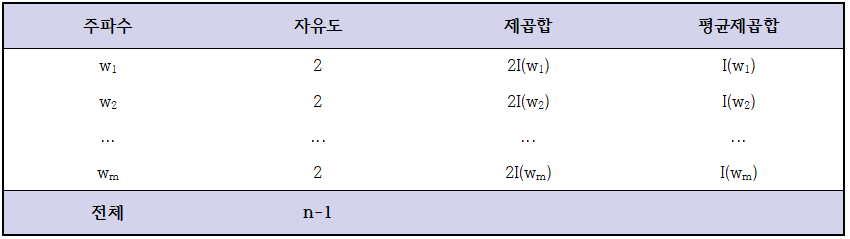

In [3]:
Image("C:/Users/jy990/Study/Time Series/Image/7.2.PNG")

### (B) Periodogram smoothing

현실 시계열 데이터에 대한 주파수별 주기도는 부드러운 곡선 형태가 아니다. 따라서 해당 주파수 전후 주기도 편균을 취해 추정하는 smoothing 기법을 널리 활용한다. 주파수 $w_k$에 대해 $L = 2l + 1$의 평균을 취할 경우, 평활화된 주기도는 아래와 같다.  

$$
\tilde{I}(w_k) = \sum_{j = -l}^l \frac{1}{2l+1} I(w_k + \frac{2\pi j}{n})
$$  

이는 *Daniell*에 의해 제안되었는데, 이 외에도 *Welch, Bartlett* 등의 방법이 있다. 위 평활화에서는 $L = 2l+1$ 개의 주기도 값에 동일한 가중치를 부여한 것으로 볼 수 있는데, 이 가중치를 일반화하여 서로 다르나 중심에 대칭인 함수 $W(j)$랄 사용하면 아래와 같은 평활화를 고려할 수도 있다.  

$$
\tilde{I}(w_k) = \sum_{j \in B}W(j) I(w_k + \frac{2\pi j}{n})
$$  

여기서 B는 bandwith로, 아래의 성질을 갖는 가중치 함수를 사용한다.  

$$
\sum_{j \in B} W(j) = 1, \quad W(j) = W(-j), \quad \sum_{j \in B} W^2(j) \rightarrow 0 \quad as \; n \rightarrow \infty
$$

# (4) FFT algorithm

**FFT는 DFT의 optimized algorithm**이다. 신호가 시간에 따라 sample되고 frequency로 분해될 때, 이 frequency component들은 단일 사인파로 나타난다. 이런 변환은 아래 그림을 통해 설명된다.

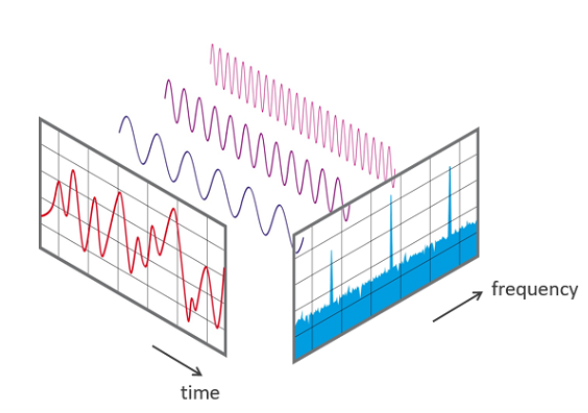

In [2]:
Image("C:/Users/jy990/Study/Time Series/Image/7.1.PNG")

신호가 인식되어 저장될 때 2가지 파라미터 값이 필요하다. 
- (1) sampling rate of $fs$ (average number of sampled obtained in 1$sec$)
- (2) sample size (BlockLength ; $BL$) $\rightarrow$ base 2 in FFT  

$fs$와 $BL$로부터 더 많은 측정 파라미터들이 계산된다. 

- (1) Bandwidth $fn$ (maximum frequency that can be determined by FFT) $fn = \frac{fs}{2}$ $\rightarrow$ 측정이 필요한 건 절반만 있으면 되니까.
- (2) Measurement Duration $D = \frac{BL}{fs}$
- (3) Frequency resolution $df$ (frequency spacing between 2 measurement results) $df = \frac{fs}{BL}$  

일반적으로 $fs$는 시스템에서 주어지는 변수다. 따라서 $BL$을 어떻게 선택하는지에 따라 여러 파라미터가 정의된다. 만약 $BL$이 작으면 smooth하한 분해능으로 빠른 측정 반복을 수행할 수 있고, $BL$이 크면 느린 측정 반복을 해야 한다.

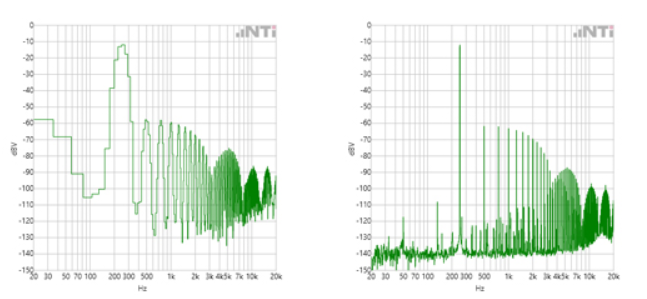

In [4]:
Image("C:/Users/jy990/Study/Time Series/Image/7.3.PNG")

Fourier transformation에서는 sapled signal segment가 무한한 시간에서 반복된다고 가정한다. 이런 가정은 다음 2개의 결론으로 이어진다.  

- (1) FFT는 periodic signal에만 쓸 수 있다.
- (2) sampled signal segment는 전체 기간을 포함해야만 한다.  

여기서 조건 (2)를 달성하는 신호는 많지 않다. 주파수가 $df$의 배수인 신호는 다양한 value를 가지며, 이는 time signal의 jump로 이어지기 때문이다. 이를 "Smeared" FFT spectrum이라고 부른다. (= Leakage)  

Smearing을 방지하기 위해 "windowing"이라는 기술이 적용된다. 이는 가중치 함수를 적용해 신호가 부드럽게 켜지고 꺼질 수 있게 만든다. 그래서 "windowed signal"은 진폭 0인 상태에서 시작하고 끝난다. 

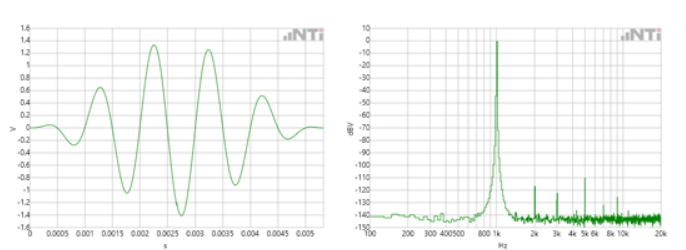

In [5]:
Image("C:/Users/jy990/Study/Time Series/Image/7.4.PNG")